In [139]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'darkslategray', 'olive', '#9467bd', '#8c564b', '#e377c2', 'indigo', '#7f7f7f', '#bcbd22', '#17becf', 'tan', 'saddlebrown', 'darkgreen']
# Set the color cycle
plt.rc('axes', prop_cycle=(cycler('color', colors)))

# Dictionary to store the loaded arrays
L = 4
N = L*L
periodic = False
model = "2DTFIM"

if model == "2DXXZ":
    int_ = "delta"
    params = [1.2, 1.05, 1., 0.95, 0.8, 0.2,-0.2, -0.8, -0.95, -1.0, -1.05, -1.2]  #sigmaz interaction
elif model == "2DJ1J2":
    int_ = "J2"
    params = [0.2, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.8, 1.0, 1.05, 1.2] #J2
elif model == "2DTFIM":
    int_ = "B"
    params =  [0, -0.5, -1.0, -1.2, -1.4, -1.6, -1.8, -2.0, -2.5, -4.0] #magnetic field

cmi = {}
mean_corr= {}
var_corr = {}
gap = {}
cmi_traceout = {}
mag = {}
# Looping through the values and loading each file
for param in params:
    filename = f"result/{model}/cmi_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi[param] = np.load(filename)
    filename = f"result/{model}/mean_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mean_corr[param] = np.load(filename)
    filename = f"result/{model}/var_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    var_corr[param] = np.load(filename)
    filename = f"result/{model}/gap_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    gap[param] = np.load(filename)
    filename = f"result/{model}/cmi_traceout_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi_traceout[param] = np.load(filename, allow_pickle=True)
    filename = f"result/{model}/mag_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mag[param] = np.load(filename)


In [140]:
cmi_length = []
err_cmi_length =[]
corre_length = []
err_corre_length = []
cmi_length_traceout = [[] for i in range (len(params))]
err_cmi_length_traceout = [[] for i in range (len(params))]
for i in params:
    df = len(cmi[i])-2
    (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
    mean_x = np.mean(np.arange(len(cmi[i])))
    err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i])) - mean_x)**2))
    cmi_length.append(cmi_len)
    err_cmi_length.append(err)

    df = len(mean_corr[i])-2
    (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(np.abs(mean_corr[i])), 1, full=True)
    mean_x = np.mean(np.arange(len(mean_corr[i])))
    err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i])) - mean_x)**2))
    corre_length.append(corr_len)
    err_corre_length.append(err)

    for j in range(len(cmi_traceout[i])):
        df = len(cmi_traceout[i][j])-2
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])), -np.log(cmi_traceout[i][j]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi_traceout[i][j])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i][j])) - mean_x)**2))
        cmi_length_traceout[params.index(i)].append(cmi_len)
        err_cmi_length_traceout[params.index(i)].append(err)




C:\Users\Administrator\AppData\Local\Temp\ipykernel_25800\2118196990.py:9: RuntimeWarning: divide by zero encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25800\2118196990.py:24: RuntimeWarning: divide by zero encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])), -np.log(cmi_traceout[i][j]), 1, full=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_25800\4087840787.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(cmi[i]), label= int_+"="+str(i))


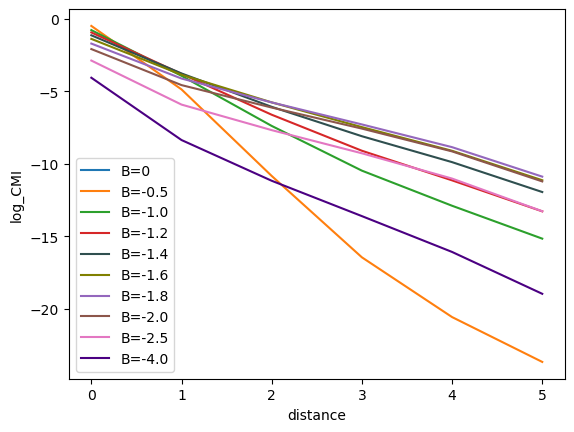

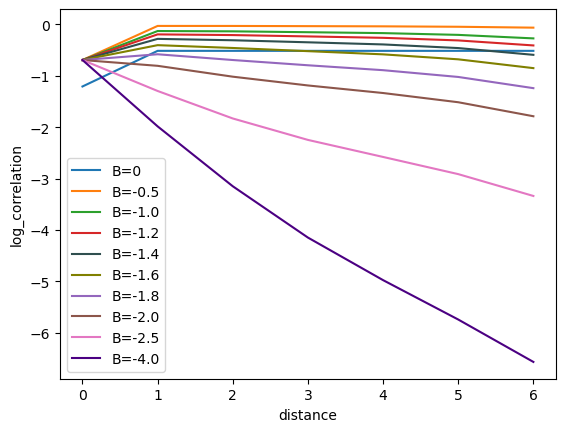

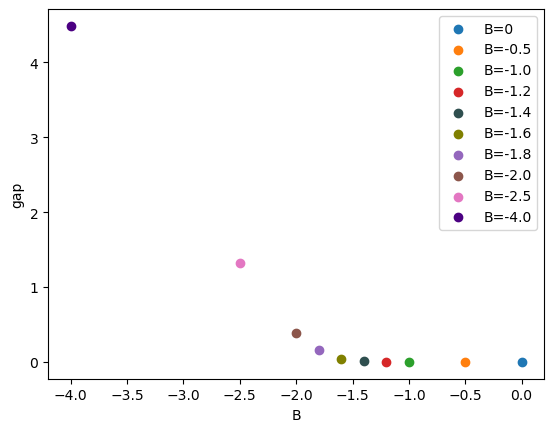

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25800\4087840787.py:27: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(mean_corr[i][1:])), np.log(cmi[i]), label=int_+"="+str(i))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25800\4087840787.py:28: RuntimeWarning: divide by zero encountered in log
  plt.fill_betweenx(np.log(cmi[i]), np.log(np.abs(mean_corr[i][1:])) - 1/np.abs(mean_corr[i][1:])*np.sqrt(var_corr[i][1:]) , np.log(np.abs(mean_corr[i][1:])) + 1/np.abs(mean_corr[i][1:])*np.sqrt(var_corr[i][1:]), alpha=0.2)


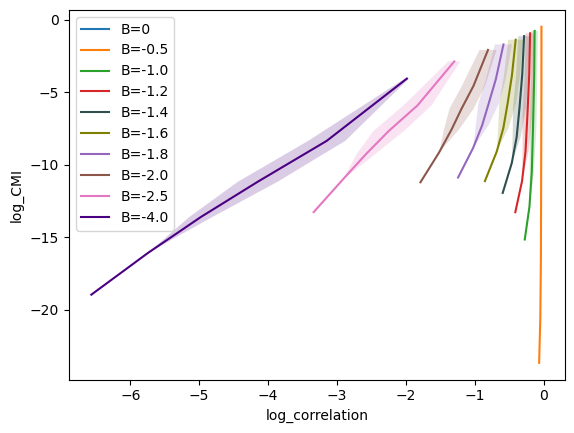

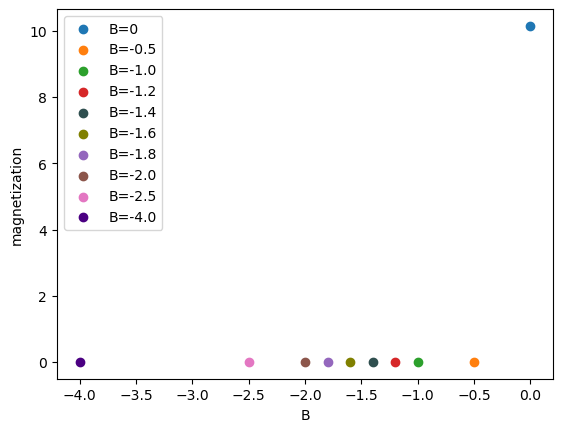

In [141]:
for i in params:
    plt.plot(np.log(cmi[i]), label= int_+"="+str(i))
plt.xlabel("distance")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/cmi_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    plt.plot(np.log(np.abs(mean_corr[i])), label=int_+"="+str(i))
    #plt.fill_between(np.arange(len(mean_corr[i])) ,np.log(np.abs(mean_corr[i])) - 1/mean_corr[i]*np.sqrt(var_corr[i]) , np.log(np.abs(mean_corr[i])) + 1/np.abs(mean_corr[i])*np.sqrt(var_corr[i]), alpha=0.2)
plt.xlabel("distance")
plt.ylabel("log_correlation")
plt.legend()
plt.savefig("figure/"+model+"/correlation_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    plt.scatter(i, gap[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("gap")
plt.legend()
plt.savefig("figure/"+model+"/gap_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    plt.plot(np.log(np.abs(mean_corr[i][1:])), np.log(cmi[i]), label=int_+"="+str(i))
    plt.fill_betweenx(np.log(cmi[i]), np.log(np.abs(mean_corr[i][1:])) - 1/np.abs(mean_corr[i][1:])*np.sqrt(var_corr[i][1:]) , np.log(np.abs(mean_corr[i][1:])) + 1/np.abs(mean_corr[i][1:])*np.sqrt(var_corr[i][1:]), alpha=0.2)
plt.xlabel("log_correlation")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/correlation_cmi_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    plt.scatter(i, mag[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("magnetization")
plt.legend()
plt.savefig("figure/"+model+"/mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

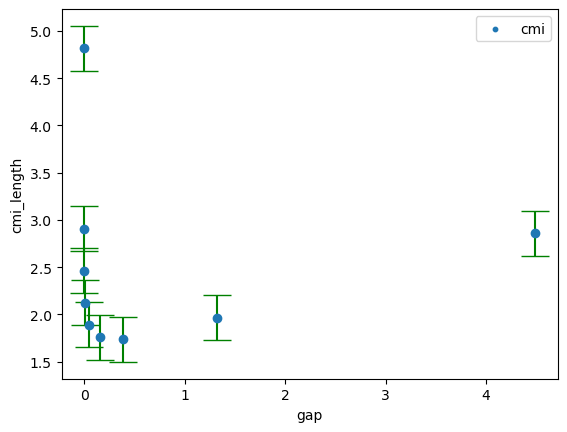

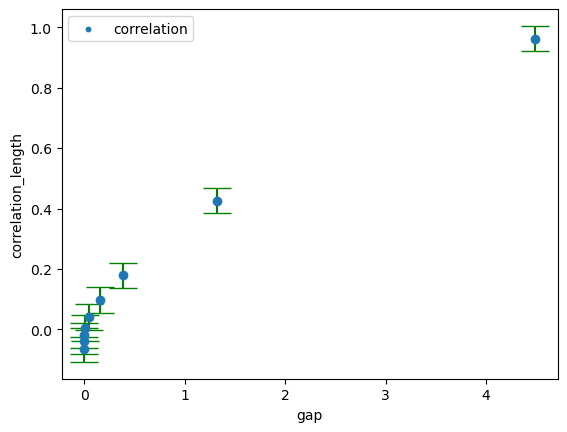

In [137]:
gap_list = []
for i in params:
    gap_list.append(gap[i])

plt.scatter(gap_list, cmi_length, label="cmi", s=10)
plt.errorbar(gap_list, cmi_length, yerr=err_cmi_length[:][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("cmi_length")
plt.legend()
plt.savefig("figure/"+model+"/cmi_length_gap_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

plt.scatter(gap_list, corre_length, label="correlation", s=10)
plt.errorbar(gap_list, corre_length, yerr=err_corre_length[:][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("correlation_length")
plt.legend()
plt.savefig("figure/"+model+"/correlation_length_gap_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()


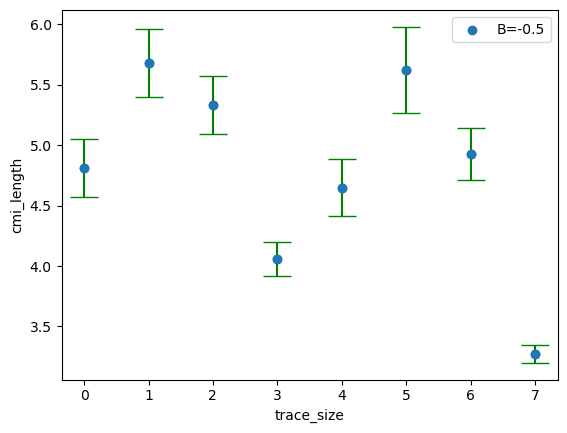

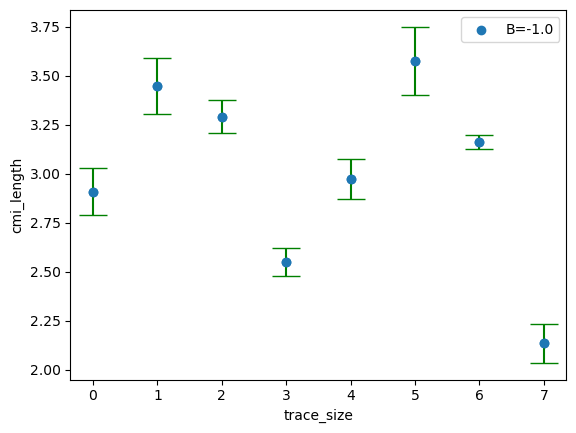

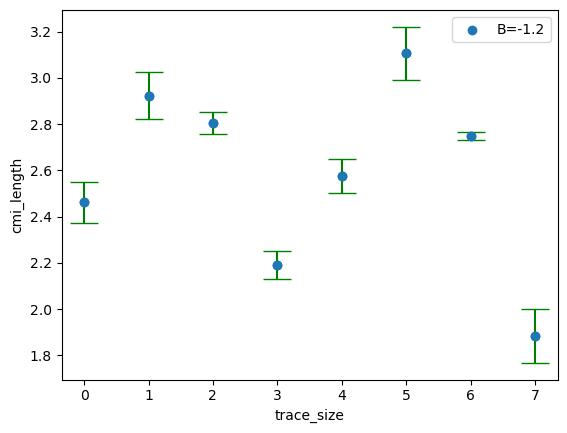

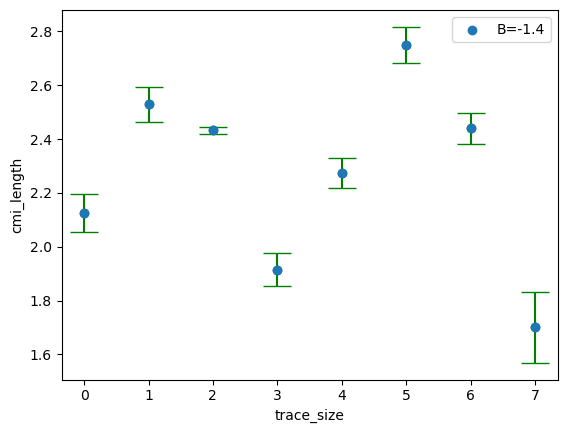

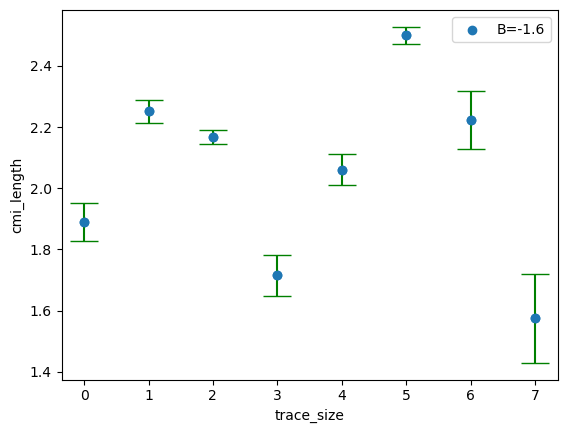

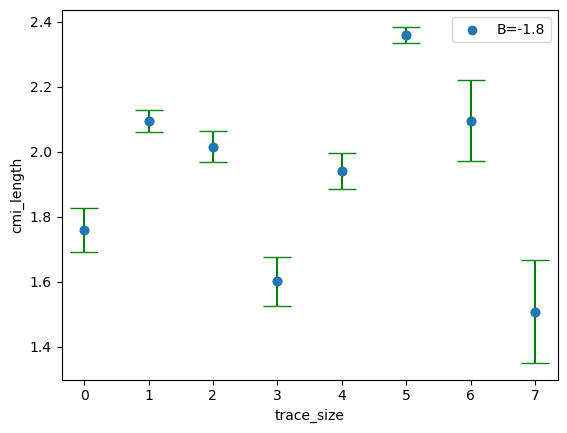

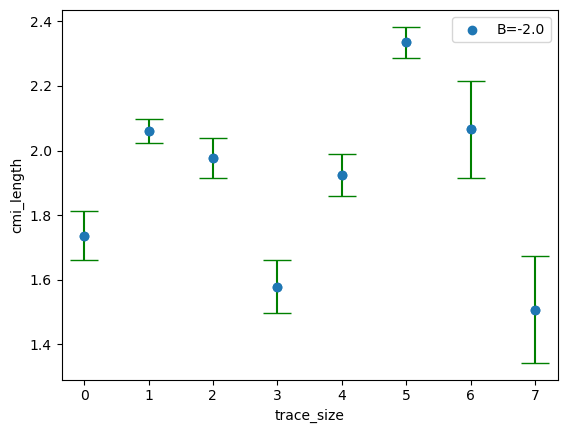

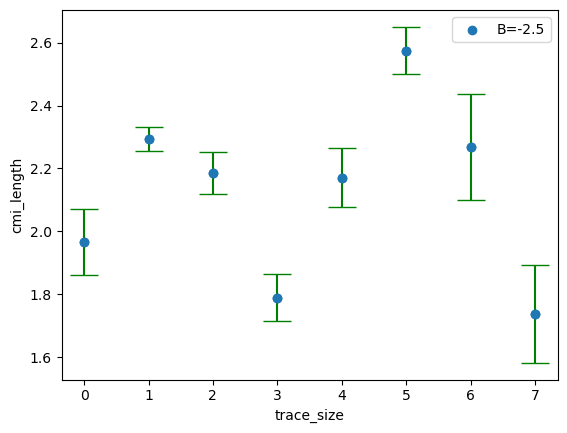

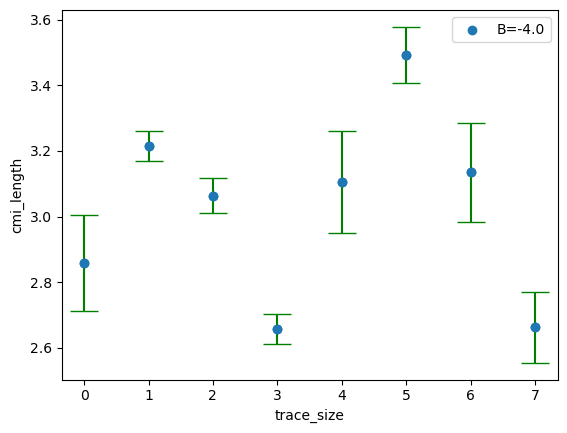

<Figure size 640x480 with 0 Axes>

In [138]:
for i in range(len(params)):
    plt.scatter(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], label = int_+"="+str(params[i]))
    plt.errorbar(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], yerr=np.array(err_cmi_length_traceout[i]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("trace_size")
    plt.ylabel("cmi_length")
    plt.legend()
    plt.savefig("figure/"+model+"/traceout/cmi_length_traceout_2DJ1J2_L"+str(L)+"_J2="+str(params[i])+"_periodic_"+str(periodic)+".png")
    plt.show()
    plt.clf()